#### 지역별 남자와 여자의 비율

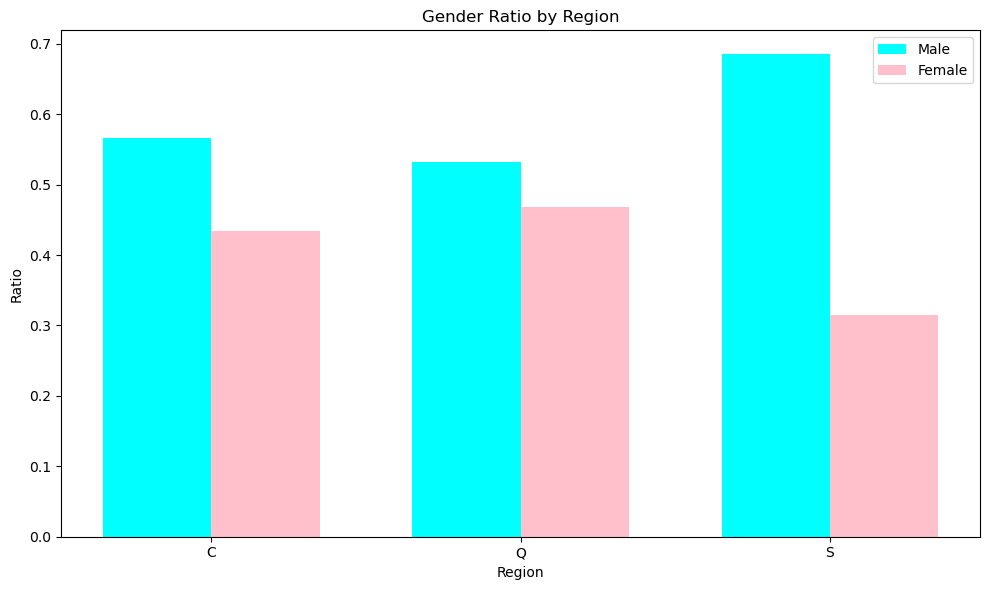

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 불러오기
df = pd.read_csv('./titanic/train.csv')

# 지역별로 남자와 여자를 구분하여 인원수 계산
gender_counts_by_region = df.groupby(['Embarked', 'Sex']).size().unstack()

# 비율 계산
total_counts_by_region = gender_counts_by_region.sum(axis=1)
male_ratio_by_region = gender_counts_by_region['male'] / total_counts_by_region
female_ratio_by_region = gender_counts_by_region['female'] / total_counts_by_region

# 그래프 그리기
plt.figure(figsize=(10, 6))

x = np.arange(len(gender_counts_by_region.index))
width = 0.35

plt.bar(x - width/2, male_ratio_by_region, width, label='Male', color='cyan')
plt.bar(x + width/2, female_ratio_by_region, width, label='Female', color='pink')

plt.xlabel('Region')
plt.ylabel('Ratio')
plt.title('Gender Ratio by Region')
plt.xticks(x, gender_counts_by_region.index.tolist())
plt.legend()

plt.tight_layout()
plt.show()


#### 지역별 남녀의 비율과 사망한 남녀의 비율

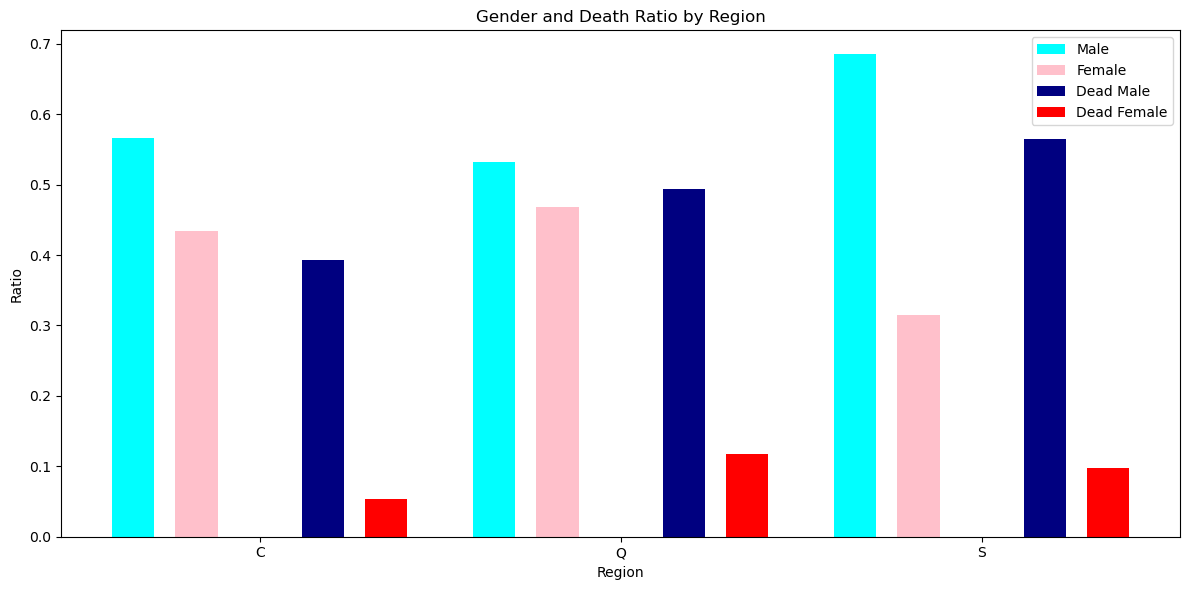

In [16]:
# 지역별로 남자와 여자를 구분하여 인원수 계산
gender_counts_by_region = df.groupby(['Embarked', 'Sex']).size().unstack()

# 비율 계산
total_counts_by_region = gender_counts_by_region.sum(axis=1)
male_ratio_by_region = gender_counts_by_region['male'] / total_counts_by_region
female_ratio_by_region = gender_counts_by_region['female'] / total_counts_by_region

# 사망자 비율 계산 (성별로 구분)
dead_counts_by_gender_and_region = df[df['Survived'] == 0].groupby(['Embarked', 'Sex']).size().unstack()
dead_male_ratio_by_region = dead_counts_by_gender_and_region['male'] / total_counts_by_region
dead_female_ratio_by_region = dead_counts_by_gender_and_region['female'] / total_counts_by_region

# 그래프 그리기
plt.figure(figsize=(12, 6))

x = np.arange(len(gender_counts_by_region.index))
width = 0.35

plt.bar(x - width, male_ratio_by_region, width/3, label='Male', color='cyan')
plt.bar(x - width/2, female_ratio_by_region, width/3, label='Female', color='pink')
plt.bar(x + width/2, dead_male_ratio_by_region, width/3, label='Dead Male', color='navy')
plt.bar(x + width, dead_female_ratio_by_region, width/3, label='Dead Female', color='red')

plt.xlabel('Region')
plt.ylabel('Ratio')
plt.title('Gender and Death Ratio by Region')
plt.xticks(x, gender_counts_by_region.index.tolist())
plt.legend()

plt.tight_layout()
plt.show()